In [1]:
# Risk vs returns

/home/tikam/stock-market/env3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/home/tikam/stock-market/env3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/home/tikam/stock-market/env3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[***

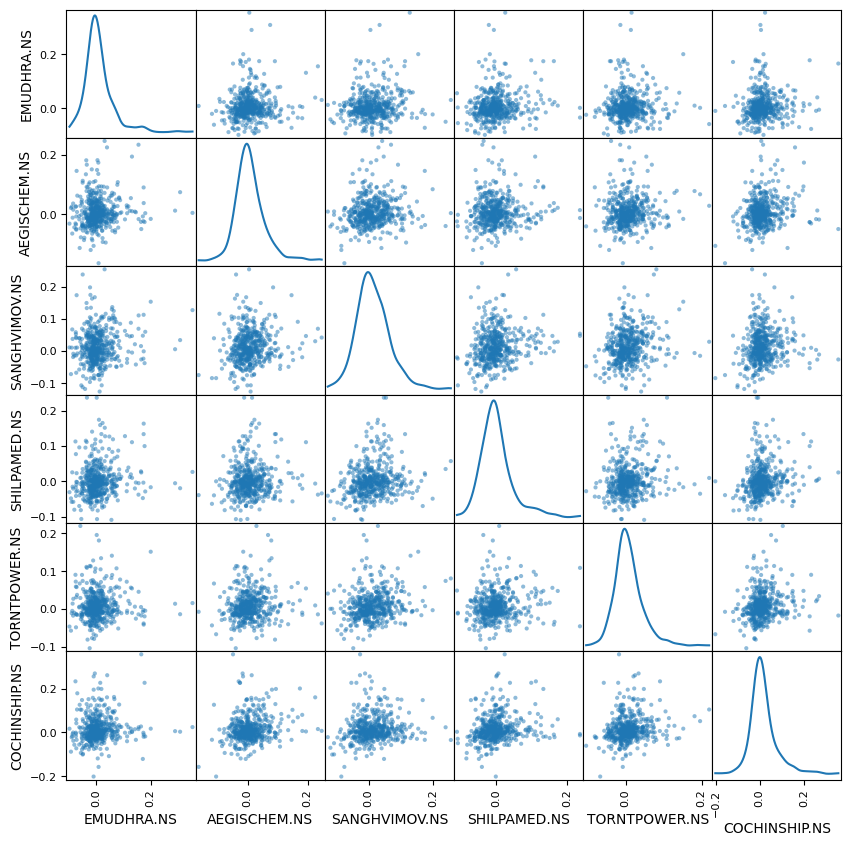

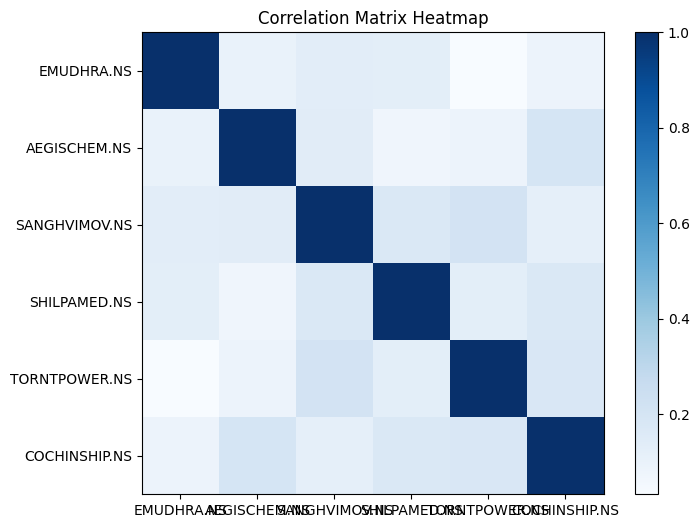

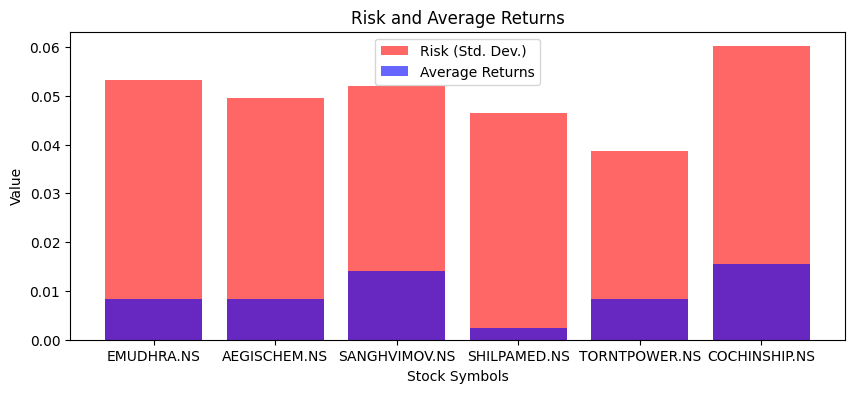

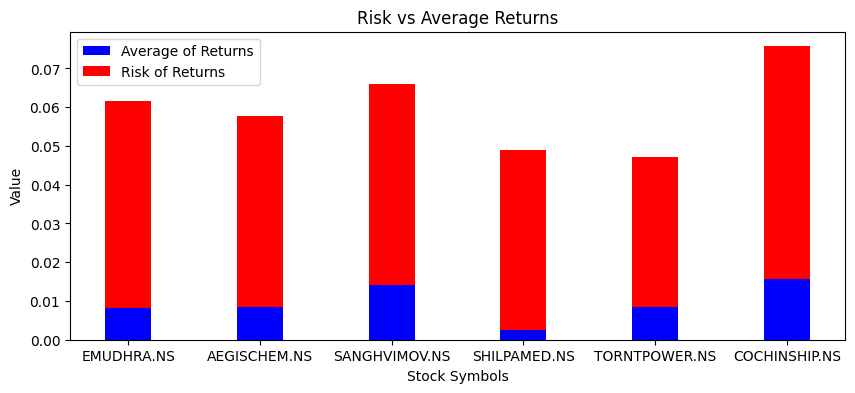

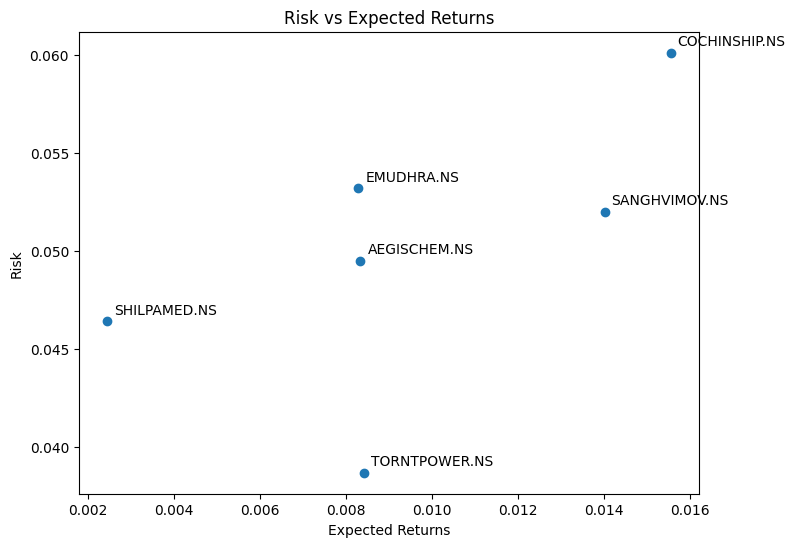

Table: Risk vs Expected Returns
                   Risk  Expected Returns
EMUDHRA.NS     0.053209          0.008294
AEGISCHEM.NS   0.049504          0.008341
SANGHVIMOV.NS  0.052008          0.014020
SHILPAMED.NS   0.046424          0.002443
TORNTPOWER.NS  0.038667          0.008431
COCHINSHIP.NS  0.060122          0.015556


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

# Setting stock symbols and time range
symbols = ['EMUDHRA.NS', 'AEGISCHEM.NS', 'SANGHVIMOV.NS', 'SHILPAMED.NS', 'TORNTPOWER.NS', 'COCHINSHIP.NS']
start = dt.date.today() - dt.timedelta(days=365*3)
end = dt.date.today()

# Downloading and processing stock data
df = pd.DataFrame()
for symbol in symbols:
    df[symbol] = yf.download(symbol, start=start, end=end)['Adj Close']

# Dropping rows with missing values
df = df.dropna()

# Calculating percentage change in stock prices
rets = df.pct_change(periods=3)

# Plotting scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(rets, diagonal='kde', figsize=(10, 10))

# Creating correlation matrix heatmap
corr = rets.corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Plotting bar charts for risk and average returns
plt.figure(figsize=(10, 4))
plt.bar(rets.columns, rets.std(), color='red', alpha=0.6, label='Risk (Std. Dev.)')
plt.bar(rets.columns, rets.mean(), color='blue', alpha=0.6, label='Average Returns')
plt.title("Risk and Average Returns")
plt.xlabel("Stock Symbols")
plt.ylabel("Value")
plt.legend()
plt.show()

# Stacked bar chart for risk vs return
plt.figure(figsize=(10, 4))
width = 0.35
ind = np.arange(len(symbols))
plt.bar(ind, rets.mean(), width, color='blue', label='Average of Returns')
plt.bar(ind, rets.std(), width, bottom=rets.mean(), color='red', label='Risk of Returns')
plt.ylabel('Value')
plt.xlabel('Stock Symbols')
plt.title('Risk vs Average Returns')
plt.xticks(ind, symbols)
plt.legend()
plt.show()

# Scatter plot for expected returns vs risk
plt.figure(figsize=(8, 6))
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(5, 5), textcoords='offset points')
plt.title('Risk vs Expected Returns')
plt.show()

# Display table with risk vs expected returns
risk_returns_table = pd.DataFrame({'Risk': rets.std(), 'Expected Returns': rets.mean()})
print("Table: Risk vs Expected Returns")
print(risk_returns_table)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt




In [22]:
# Define the list of stock symbols
stock_symbols = ['EMUDHRA.NS','AEGISCHEM.NS']

# Initialize an empty DataFrame
stocks_data = pd.DataFrame()

# Download stock data using yfinance and concatenate into a single DataFrame
for symbol in stock_symbols:
    stock = yf.Ticker(symbol)
    data = stock.history(period="max")
    data['Symbol'] = symbol  # Add a column to identify the stock
    stocks_data = pd.concat([stocks_data, data])
    
    

# # Now you can perform operations on stocks_data
# descriptive_stats = stocks_data.groupby('Symbol')['Close'].describe()
# print(descriptive_stats)

# Assuming the 'Date' column is in the index, reset the index
stocks_data.reset_index(inplace=True)

# Convert the 'Date' column to datetime format
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])

# Pivot the DataFrame
pivot_data = stocks_data.pivot(index='Date', columns='Symbol', values='Close')

#pivot_data


# Ensure the DataFrame is sorted by 'Date'
stocks_data.sort_values(by='Date', inplace=True)

# Now calculate the percentage change
rets = stocks_data.pct_change(periods=3)
rets


/home/tikam/stock-market/env3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/tikam/stock-market/env3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [23]:
# Define the list of stock symbols
stock_symbols = ['EMUDHRA.NS','AEGISCHEM.NS']

# Initialize an empty DataFrame
stocks_data = pd.DataFrame()

# Download stock data using yfinance and concatenate into a single DataFrame
for symbol in stock_symbols:
    stock = yf.Ticker(symbol)
    data = stock.history(period="max")
    data['Symbol'] = symbol # Add a column to identify the stock
    stocks_data = pd.concat([stocks_data, data])

# Convert the 'Close' column to a numeric type
stocks_data['Close'] = stocks_data['Close'].astype(float)

# Assuming the 'Date' column is in the index, reset the index
stocks_data.reset_index(inplace=True)

# Convert the 'Date' column to datetime format
stocks_data['Date'] = pd.to_datetime(stocks_data['Date'])

# Pivot the DataFrame
pivot_data = stocks_data.pivot(index='Date', columns='Symbol', values='Close')

# Ensure the DataFrame is sorted by 'Date'
stocks_data.sort_values(by='Date', inplace=True)

# Now calculate the percentage change
rets = stocks_data.pct_change(periods=3)
rets


/home/tikam/stock-market/env3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
AEGISCHEM.NS: No price data found, symbol may be delisted (1d 1925-05-25 -> 2024-04-30)
/tmp/ipykernel_24180/2336162277.py:12: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  stocks_data = pd.concat([stocks_data, data])
/tmp/ipykernel_24180/2336162277.py:30: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA

TypeError: unsupported operand type(s) for /: 'str' and 'str'